In [1]:
import numpy as np
import math
from sympy import *
import matplotlib.pyplot as plt

## Q1

### What is the probability density function(PDF)?

In [2]:
t = symbols('t')
Lambda = symbols('λ')
pdf = (2*t*exp((-((t**2))/(Lambda**2))))/(Lambda**2)

In [3]:
pdf

2*t*exp(-t**2/λ**2)/λ**2

In [4]:
Lambda = 500 # λ = 500 days
pdf = (2*t*exp((-((t**2))/(Lambda**2))))/(Lambda**2)

In [5]:
pdf

t*exp(-t**2/250000)/125000

#### Ploting the PDF:

In [6]:
def PDF(t):
    return (2*t*exp((-((t**2))/(Lambda**2))))/(Lambda**2)

In [7]:
lst = []
for t_ in range(1500):
    lst.append(PDF(t_))
    
plt.plot(np.array(lst));

KeyboardInterrupt: 

## A- Check if it's a valid PDF!

* #### non-negatives

In [ ]:
array = np.array(lst)
print(f'number of nigative values: {(array<0).sum()}')

number of nigative values: 0


* #### area under the curve

In [ ]:
print("area under the curve is:", integrate(pdf, [t,0,oo]))

area under the curve is: 1


## B- How long after installation should we do preventative maintenance if we wish to have the probability of unexpected failure be less than 1%, 10%, 50%, and 99%?

In [ ]:
def when_to_preventative_maintenance(probability):

    for i in range(1500):
        day = array[:i]

        if np.trapz(day) > probability:
            return i

In [ ]:
probabilities = [0.01,0.1,0.5,0.99]
for probability in probabilities:
    n_day = when_to_preventative_maintenance(probability)
    print(f'We should prevent maintenance in day {n_day} to have the probability of unexpected failure be less than {int(probability*100)}%')

We should prevent maintenance in day 52 to have the probability of unexpected failure be less than 1%
We should prevent maintenance in day 164 to have the probability of unexpected failure be less than 10%


KeyboardInterrupt: 

## C- What is the expected lifetime for this pump? What is the probability of failure before the expected lifetime?

In [ ]:
exp_l_t = integrate(pdf*t, [t,0,oo])
print(f'the expected lifetime for this pump is {int(exp_l_t)} days')
pf = integrate(pdf,[t,0,exp_l_t])
print(f'the probability of failure before the expected lifetime {float(pf)*100}%')

the expected lifetime for this pump is 443 days
the probability of failure before the expected lifetime 54.40618722340038%


## D- What is the variance of the pump’s lifetime? What is the range of the lifetime that falls within one standard deviation of the expected value?

In [ ]:
variance = integrate(pdf*((t - exp_l_t )**2) , [t,0, oo])
print(f'the variance of the pump’s lifetime is {round(variance,2)}')
print(f'the range of the lifetime that falls within one standard deviation of the expected value is {round(sqrt(variance),2)}')

the variance of the pump’s lifetime is 53650.46
the range of the lifetime that falls within one standard deviation of the expected value is 231.63


## E- Write a program that generates samples of t from its distribution!

In [ ]:
def generator(tm):

    print(f'for number of times = {tm}:')

    RCs = np.zeros((10**6,))
    Ss = np.zeros((10**6,))
    
    for i in range(10**6):

        uf = np.random.uniform()
        Ss[i] = math.log(-1/(uf-1))*1000

        if Ss[i] <= tm:
            RCs[i] = 250/Ss[i]
        else:
            RCs[i] = 50/tm

    print(f'\tthe average running cost is {round(np.mean(RCs),2)}$')
    print(f'\tthe sample average is {round(np.mean(Ss),2)}')
    print(f'\tthe sample variance is {round(np.var(Ss),2)}')

In [ ]:
for tm in [1,10,100,1000,10000]:
    generator(tm)

for number of times = 1:
	the average running cost is 71.89$
	the sample average is 1001.8
	the sample variance is 1004503.53
for number of times = 10:
	the average running cost is 7.47$
	the sample average is 998.43
	the sample variance is 995815.84
for number of times = 100:
	the average running cost is 3.47$
	the sample average is 1001.01
	the sample variance is 1000568.6
for number of times = 1000:
	the average running cost is 3.24$
	the sample average is 1000.35
	the sample variance is 999921.15
for number of times = 10000:
	the average running cost is 3.53$
	the sample average is 999.65
	the sample variance is 998694.59


## Q2

In [ ]:
p = (2*8 + 3*5 + 4*20)/(1000*(8+5+20))
def prob_out(n_trans, p_out,p=p):
        
    return (p_out*(n_trans/(8+5+20)))/p

In [ ]:
m1 = prob_out(8, 2/1000,p)
m2 = prob_out(5, 3/1000,p)
m3 = prob_out(20, 4/1000,p)

In [ ]:
prob = m1*100/(m1+m2+m3)
print(f"There's a probability that it's from manufacturer 1 of {prob}%")

There's a probability that it's from manufacturer 1 of 14.414414414414415%


## Q3

In [ ]:
j = 0.1
σ = 0.05
K1 = (3*σ + (9*(σ**2) +4*j)**-2/-j*2)**2
K2 = (3*σ - (9*(σ**2) +4*j)**-2/-j*2)**2

print(f'in case 1 it required {round(K1,2)} secound')
print(f'in case 2 it required {round(K2,2)} secound')


in case 1 it required 12519.57 secound
in case 2 it required 12586.8 secound


In [ ]:
K = 1
Ks = np.zeros([10**6,20])
times = np.arange(20)

for a in range(10**6):
    for b in range(20):
        Ks[a,b] = K
        v = np.random.normal(0,σ)
        K = K - j - v

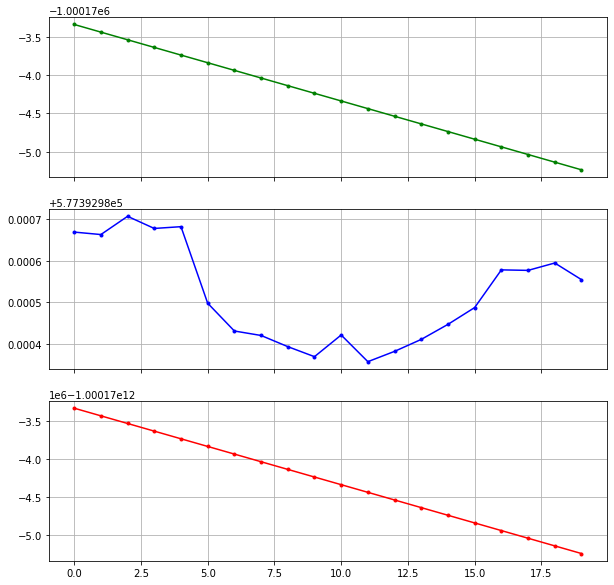

In [ ]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,10)
ax[0].plot(times,np.mean(Ks,0),'g.-')
ax[0].grid()
ax[1].plot(times,np.std(Ks,0),'b.-')
ax[1].grid()
ax[2].plot(times,np.sum(Ks,0),'r.-')
ax[2].grid()

## Q4

In [ ]:
steps = 10
er0 = 20
uncertainty_Vr0 = 25 
dk = 10
m = 7
uf = dk - m
process_uncertainty = 9 
sensor_uncertainty = 25 
measurs = [17.8, 22.6, 30.2, 37.3, 46.2, 49.5, 44.6, 50.3, 56.3, 51.6]
dynamic = np.mat([[1]])
model = np.mat([[1]])
noise_variance = np.mat([[25]])
volumes = np.zeros([steps+1])
uncertainties = np.zeros([steps+1])
volumes[0] = er0
uncertainties[0] = uncertainty_Vr0

In [ ]:
for k in range(1,steps+1):
    
    Kp = uf + dynamic*er0
    K_uncertainty = sensor_uncertainty * (dynamic**2) + process_uncertainty

    measur = measurs[k-1]
    
    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    er0 = Kp + K @ (measur - model @ Kp)
    sensor_uncertainty = (np.eye(1) - K @ model) @ K_uncertainty @ (np.eye(1) - K @ model).T + K @ noise_variance @ K.T

    volumes[k] = er0[0]
   
    uncertainties[k] = sensor_uncertainty[0]

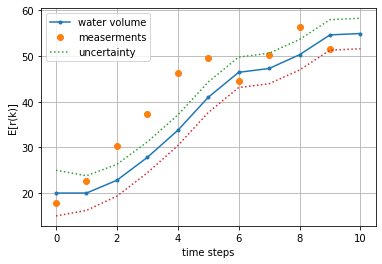

In [ ]:
plt.plot(volumes,'.-',label="water volume")
plt.plot(measurs,'o',label="measerments")
plt.plot(volumes+np.sqrt(uncertainties),':',label="uncertainty")
plt.plot(volumes-np.sqrt(uncertainties),':')

plt.ylabel('E[r(k)]')
plt.xlabel('time steps')
plt.legend()
plt.grid(True)

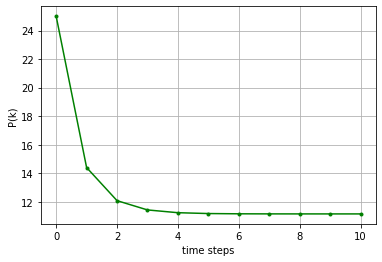

In [ ]:
plt.plot(uncertainties,'g.-')
plt.ylabel('P(k)')
plt.xlabel('time steps')
plt.grid(True)

In [ ]:
dynamics = np.mat([[1,-1],[0,1]])
model = np.mat([[1,0]])
noise_variance = np.mat([[25]])
ii = np.eye(2)
er0 = np.mat([[20],[7]])
uf = np.mat([[10],[0]])
process_uncertainty = np.mat([[0,0],[0,0.1]])
sensor_uncertainty = np.mat([[25,0],[0,1]])
volumes = np.zeros([steps+1,2])
uncertainties = np.zeros([steps+1,2])
volumes[0,0] = er0[0,0]
volumes[0,1] = er0[1,0]
uncertainties[0,0] = sensor_uncertainty[0,0]
uncertainties[0,1] = sensor_uncertainty[1,1]

In [ ]:
for k in range(1,steps+1):

    Kp = dynamics @ er0 + uf

    K_uncertainty = dynamics @ sensor_uncertainty @ dynamics.T + process_uncertainty

    measur = measurs[k-1]
    
    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    er0 = Kp + K @ (measur - model @ Kp)
    sensor_uncertainty = (ii-K @ model)@ K_uncertainty @(ii-K @ model).T + K @ noise_variance @ K.T
    
    volumes[k,0] = er0[0,0]
    volumes[k,1] = er0[1,0]
    
    uncertainties[k,0] = sensor_uncertainty[0,0]
    uncertainties[k,1] = sensor_uncertainty[1,1]

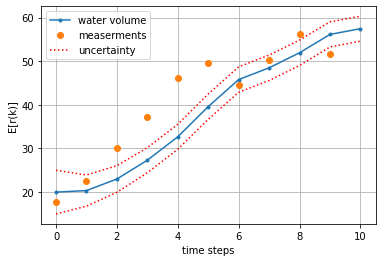

In [ ]:
plt.plot(volumes[:,0],'.-',label="water volume")
plt.plot(measurs,'o',label="measerments")
plt.plot(volumes[:,0]+np.sqrt(uncertainties[:,0]),'r:',label="uncertainty")
plt.plot(volumes[:,0]-np.sqrt(uncertainties[:,0]),'r:')

plt.ylabel('E[r(k)]')
plt.xlabel('time steps')
plt.legend()
plt.grid(True)

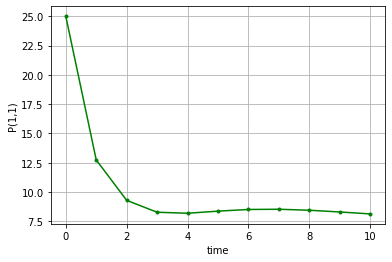

In [ ]:
plt.plot(uncertainties[:,0],'g.-')
plt.xlabel('time')
plt.ylabel('P(1,1)')
plt.grid(True)

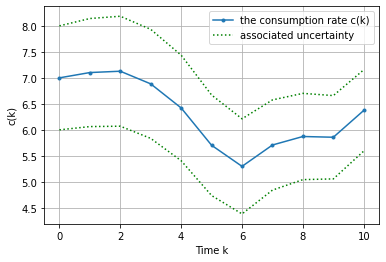

In [ ]:

plt.plot(volumes[:,1],'.-',label="the consumption rate c(k)")
plt.plot(volumes[:,1]+np.sqrt(uncertainties[:,1]),'g:',label="associated uncertainty")
plt.plot(volumes[:,1]-np.sqrt(uncertainties[:,1]),'g:')

plt.xlabel('Time k')
plt.ylabel('c(k)')
plt.grid(True)
plt.legend();

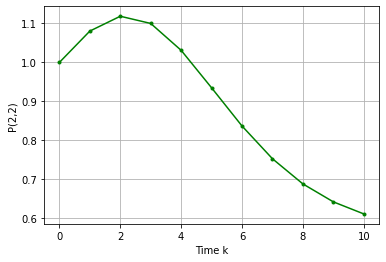

In [ ]:
plt.plot(uncertainties[:,1],'g.-',label="P(k)(2,2)")
plt.xlabel('Time k')
plt.ylabel('P(2,2)')
plt.grid(True)

In [ ]:
sigma = 0.3
dynamics = np.matrix([[1-2*sigma, sigma, sigma, 0, -1, 0, 0, 0],
               [sigma, 1-2*sigma, sigma, 0, 0, -1, 0, 0],
               [sigma, sigma, 1-3*sigma, sigma, 0, 0, -1, 0],
               [0, 0, sigma, 1-sigma, 0, 0, 0, -1],
               [0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0],
               [0,0,0,0,0,0,0,1]])
process_uncertainty=np.diag([0,0,0,0,0.1,0.1,0.1,0.1])
model = np.eye(4,8)
noise_variance = np.eye(4)*25
measur1 = np.array([59.3, 72, 64.4, 83.6, 84.9, 94.3, 84, 86.6, 89, 89.1])
measur2 = np.array([39.1, 38.4, 36.2, 43.4, 50.5, 56.3, 40.3, 58.5, 55.4, 59.6])
measur3 = np.array([31.1, 31.2, 41.6, 44.4, 41, 41.9, 39.2, 46.3, 43.3, 45.3])
measur4 = np.array([38.6, 38, 32.6, 18, 29.4, 23.3, 11, 14.6, 18.4, 20.5])
measurs_list = [measur1,measur2,measur3,measur4]
measurs = np.mat(measurs_list)
er0 = np.mat([[20],[40],[60],[20],[7],[7],[7],[7]])
sensor_uncertainty= np.diag([20,20,20,20,1,1,1,1])
uf = [[30],[0],[0],[0],[0],[0],[0],[0]]
volumes = np.zeros([steps+1,8])  
uncertainties = np.zeros([steps+1,8]) 
volumes[0,0] = er0[0,0]
volumes[0,1] = er0[1,0]
volumes[0,2] = er0[2,0]
volumes[0,3] = er0[3,0]
volumes[0,4] = er0[4,0]
volumes[0,5] = er0[5,0]
volumes[0,6] = er0[6,0]
volumes[0,7] = er0[7,0]
uncertainties[0,0] = sensor_uncertainty[0,0]
uncertainties[0,1] = sensor_uncertainty[1,1]
uncertainties[0,2] = sensor_uncertainty[2,2]
uncertainties[0,3] = sensor_uncertainty[3,3]
uncertainties[0,4] = sensor_uncertainty[4,4]
uncertainties[0,5] = sensor_uncertainty[5,5]
uncertainties[0,6] = sensor_uncertainty[6,6]
uncertainties[0,7] = sensor_uncertainty[7,7]

In [ ]:
for k in np.arange(1,steps+1):
    
    Kp = dynamics @ er0 + uf
    K_uncertainty = dynamics @ sensor_uncertainty @ dynamics.T + process_uncertainty
    
    measur = measurs[:,k-1]
    
    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    er0 = Kp + K @ (measur - model @ Kp)
    sensor_uncertainty = (np.eye(8) - K @ model) @ K_uncertainty @ (np.eye(8) - K @ model).T + K @ noise_variance @ K.T

    volumes[k,0] = er0[0,0]
    volumes[k,1] = er0[1,0]
    volumes[k,2] = er0[2,0]
    volumes[k,3] = er0[3,0]
    volumes[k,4] = er0[4,0]
    volumes[k,5] = er0[5,0]
    volumes[k,6] = er0[6,0]
    volumes[k,7] = er0[7,0]
    uncertainties[k,0] = sensor_uncertainty[0,0]
    uncertainties[k,1] = sensor_uncertainty[1,1]
    uncertainties[k,2] = sensor_uncertainty[2,2]
    uncertainties[k,3] = sensor_uncertainty[3,3]
    uncertainties[k,4] = sensor_uncertainty[4,4]
    uncertainties[k,5] = sensor_uncertainty[5,5]
    uncertainties[k,6] = sensor_uncertainty[6,6]
    uncertainties[k,7] = sensor_uncertainty[7,7]

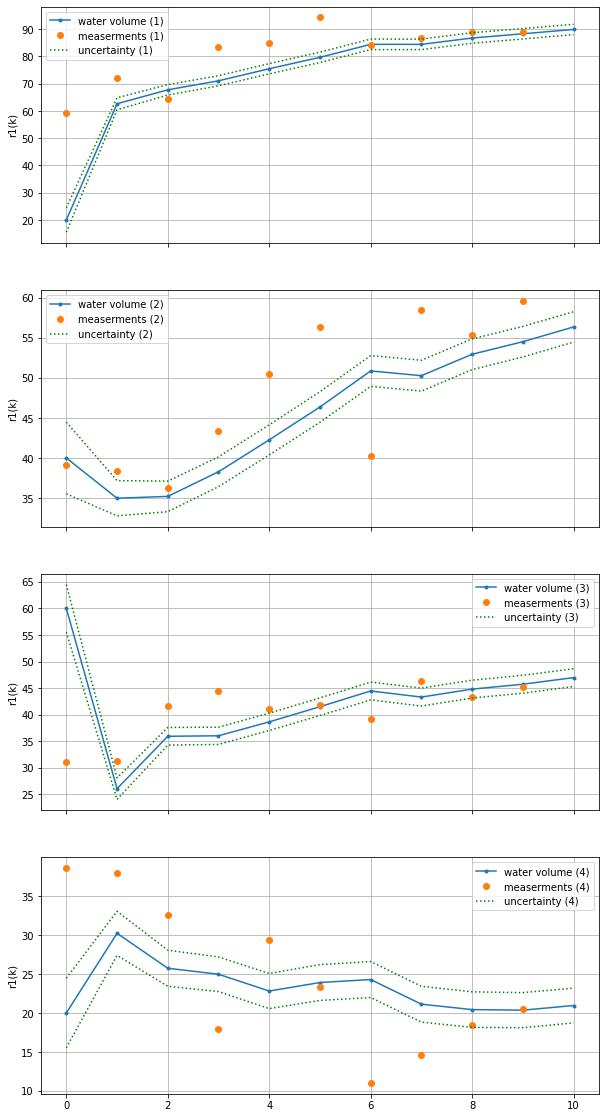

In [ ]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):

    ax[n].plot(volumes[:,n],'.-',label=f"water volume ({n+1})")
    ax[n].plot(measurs_list[n],'o',label=f"measerments ({n+1})")
    ax[n].plot(volumes[:,n]+np.sqrt(uncertainties[:,n]),'g:',label=f"uncertainty ({n+1})")
    ax[n].plot(volumes[:,n]-np.sqrt(uncertainties[:,n]),'g:',)
    
    ax[n].set_ylabel('r1(k)')
    ax[n].legend()
    ax[n].grid(True)

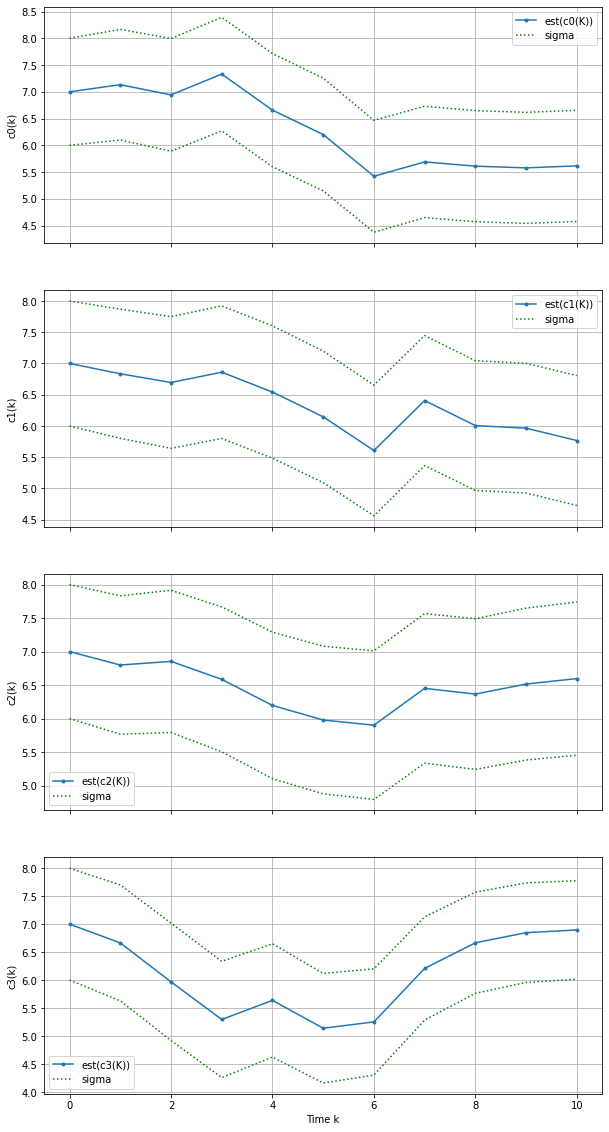

In [ ]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):
    ax[n].plot(volumes[:,n+4],'.-',label=f"est(c{n}(K))")
    ax[n].plot(volumes[:,n+4]+np.sqrt(uncertainties[:,n+4]),'g:',label="sigma")
    ax[n].plot(volumes[:,n+4]-np.sqrt(uncertainties[:,n+4]),'g:',)

    ax[3].set_xlabel('Time k')
    ax[n].set_ylabel(f'c{n}(k)')
    ax[n].legend()
    ax[n].grid(True)

In [ ]:
uncertainty_list = [np.zeros([steps+1,1]),np.zeros([steps+1,1]),np.zeros([steps+1,1]),np.zeros([steps+1,1])]  

In [ ]:
for i in range(4):

    uncertainty_list[i][0,0] = sensor_uncertainty[0,0]

for s in np.arange(1,steps+1):
    
    K_uncertainty = dynamics @ sensor_uncertainty @ dynamics.T + process_uncertainty

    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    sensor_uncertainty = (np.eye(8) - K @ model) @ K_uncertainty @ (np.eye(8) - K @ model).T + K @ noise_variance @ K.T
        
    for i in range(4):
        uncertainty_list[i][s,0] = sensor_uncertainty[i,i]  


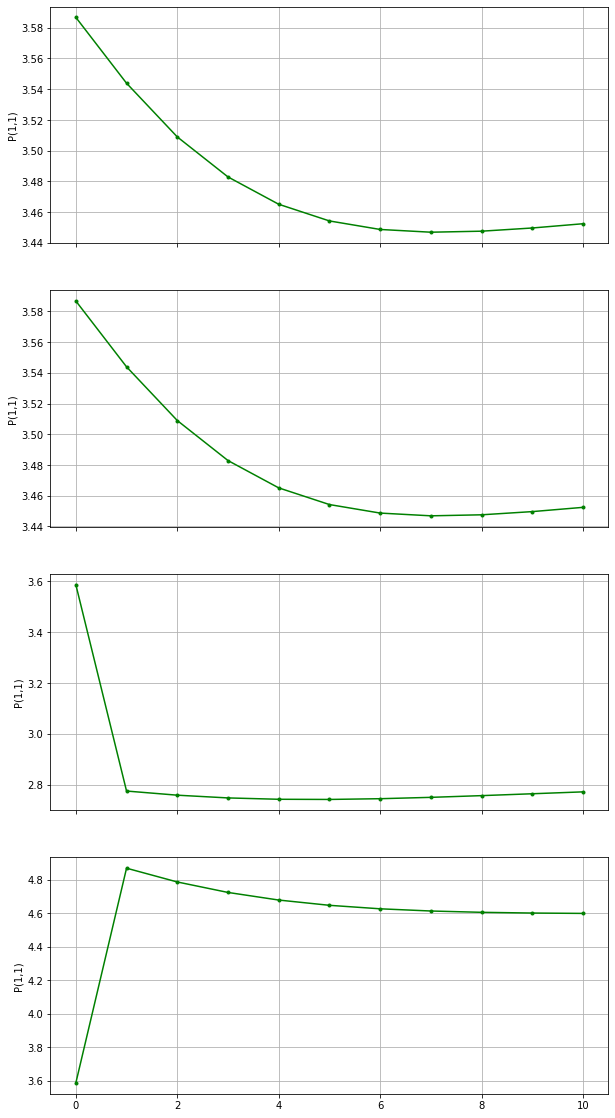

In [ ]:
fig, ax = plt.subplots(4,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(4):

    ax[n].plot(uncertainty_list[n][:,0],'g.-',label="P(1,1)")
    ax[n].set_ylabel('P(1,1)')
    ax[n].grid(True)

In [ ]:
model = np.eye(3,8)
noise_variance = np.eye(3)*2
measurs_list = [measur1,measur2,measur4]
measurs = np.mat(measurs_list)

In [ ]:
for k in np.arange(1,steps+1):
    Kp = dynamics @ er0 + uf
    K_unc0tainty = dynamics @ sensor_uncertainty @ dynamics.T + process_uncertainty
    measur = measurs[:,k-1]
    
    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    er0 = Kp + K @ (measur - model @ Kp)
    sensor_uncertainty = (np.eye(8) - K @ model) @ K_uncertainty @ (np.eye(8) - K @ model).T + K @ noise_variance @ K.T
        
    for i in range(8):
        volumes[k,i] = er0[i,0]
        uncertainties[k,0]  = sensor_uncertainty[i,i]


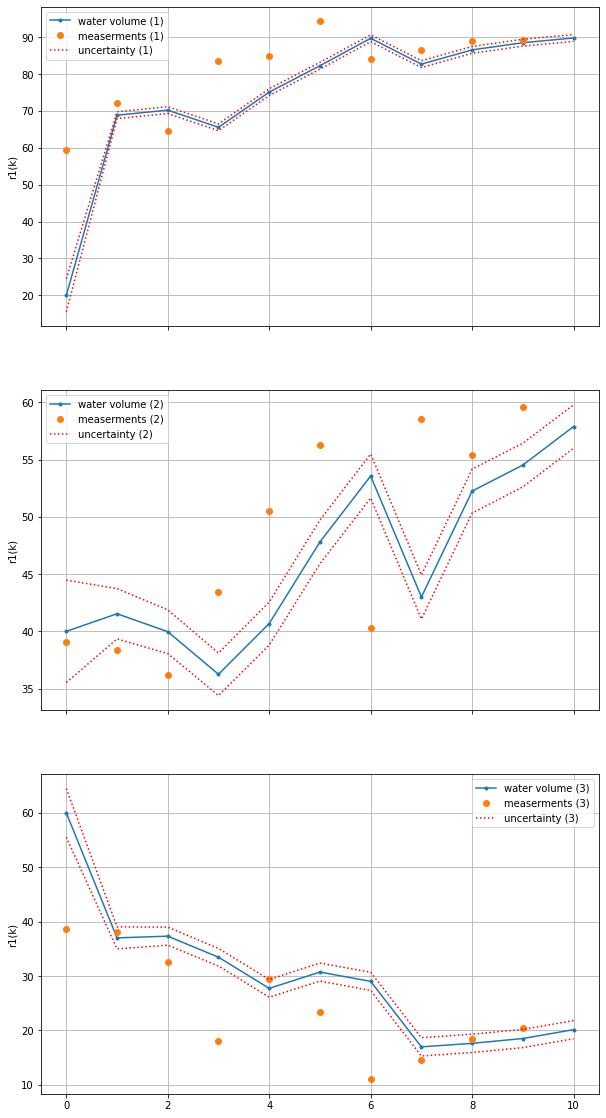

In [ ]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(3):
    ax[n].plot(volumes[:,n],'.-',label=f"water volume ({n+1})")
    ax[n].plot(measurs_list[n],'o',label=f"measerments ({n+1})")
    ax[n].plot(volumes[:,n]+np.sqrt(uncertainties[:,n]),'r:',label=f"uncertainty ({n+1})")
    ax[n].plot(volumes[:,n]-np.sqrt(uncertainties[:,n]),'r:',)
    
    ax[n].set_ylabel('r1(k)')
    ax[n].legend()
    ax[n].grid(True)

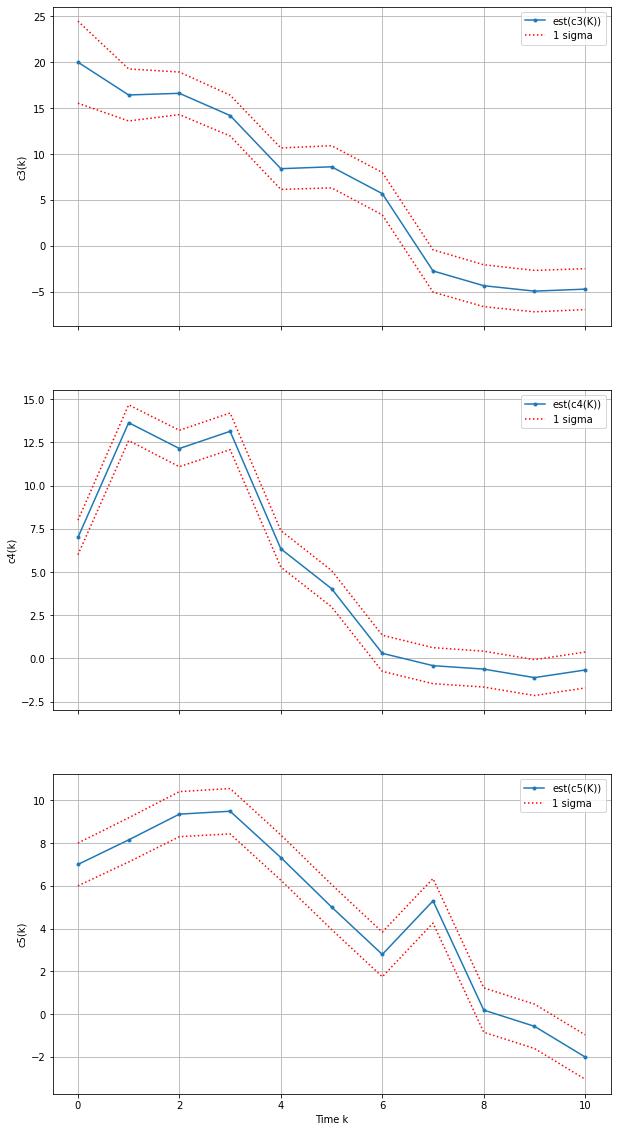

In [ ]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,20)

for n in range(3):
    
    ax[n].plot(volumes[:,n+3],'.-',label=f"est(c{n+3}(K))")
    ax[n].plot(volumes[:,n+3]+np.sqrt(uncertainties[:,n+3]),'r:',label="1 sigma")
    ax[n].plot(volumes[:,n+3]-np.sqrt(uncertainties[:,n+3]),'r:',)

    ax[2].set_xlabel('Time k')
    ax[n].set_ylabel(f'c{n+3}(k)')
    ax[n].legend()
    ax[n].grid(True)

In [ ]:
uncertainties = [np.zeros([steps+1,1]),np.zeros([steps+1,1]),np.zeros([steps+1,1])]  

In [ ]:
for i in range(3):
    uncertainties[i][0,0] = sensor_uncertainty[0,0]

for s in np.arange(1,steps+1):
    
    K_uncertainty = dynamics @ sensor_uncertainty @ dynamics.T + process_uncertainty

    K = K_uncertainty @ model.T @ np.linalg.inv(model @ K_uncertainty @ model.T + noise_variance)
    sensor_uncertainty = (np.eye(8) - K @ model) @ K_uncertainty @ (np.eye(8) - K @ model).T + K @ noise_variance @ K.T
        
    for i in range(3):
        uncertainties[i][s,0] = sensor_uncertainty[i,i]  


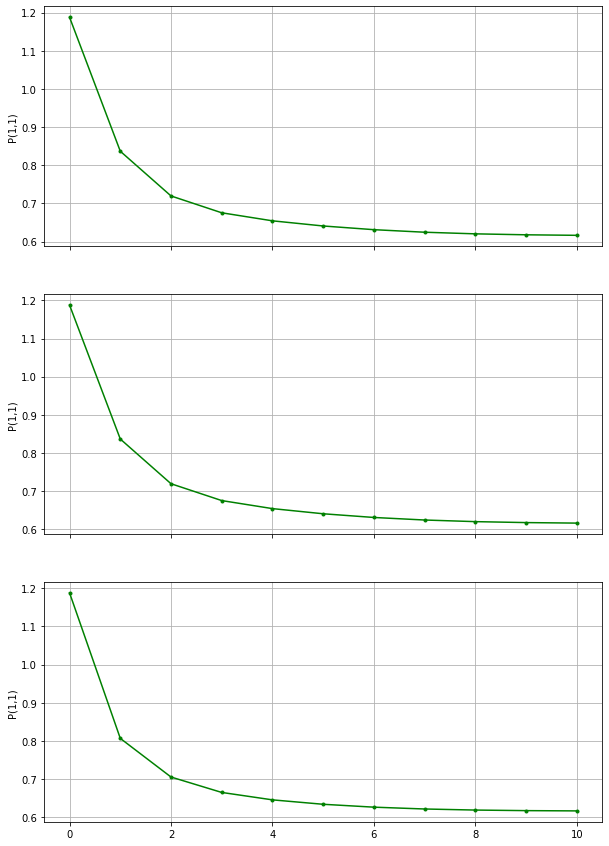

In [ ]:
fig, ax = plt.subplots(3,1,sharex=True)
fig.set_size_inches(10,15)

for n in range(3):
    ax[n].plot(uncertainties[n][:,0],'g.-')

    ax[n].set_ylabel('P(1,1)')
    ax[n].grid(True)

## Q5

In [12]:
steps = 9 
dynamic = 1
sigma_v2 = 0.05**2
sigma_w2 = 0.1**2  
q = 1 
Vr0 = 0
real_state = np.random.normal(1,0)
charges = np.zeros([steps+1,1])
uncertainties = np.zeros([steps+1,1]) 
measurments = np.zeros([steps+1,1]) 
charges[0,0] = q
uncertainties[0,0] = Vr0

In [13]:
for k in np.arange(1,steps+1):

    noise = np.random.normal(0, 0.05)
    real_state = real_state - noise - 0.1
    W = np.random.normal(0, 0.1)

    measurments[k,0] = 4 + ((real_state)-1)**3 + W    
    Kp = q - 0.1
    K_uncertainty = dynamic*Vr0*dynamic + sigma_v2
    H = 3*(Kp-1)**2
    K = K_uncertainty*H*1/(H*K_uncertainty*H + sigma_w2)
    means = 4 + ((Kp)-1)**3
    q = Kp + K*(measurments[k,0]-means)
    Vr0 = (1 - K*H)*K_uncertainty*(1 - K*H) + K*sigma_w2*K 

    charges[k,0] = q
    uncertainties[k,0] = Vr0

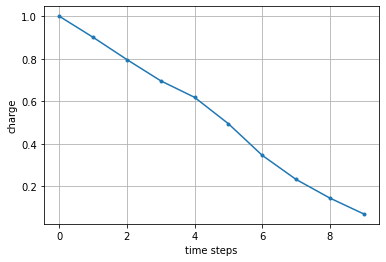

In [14]:
plt.plot(charges[:,0],'.-')
plt.xlabel('time steps')
plt.ylabel('charge')
plt.grid(True)

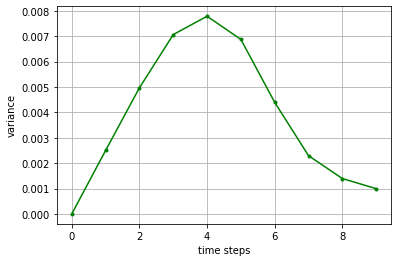

In [15]:
plt.plot(uncertainties[:,0],'g.-')
plt.xlabel('time steps')
plt.ylabel('variance')
plt.grid(True)

In [ ]:
q = 1
sigma_w = u = 0.1

time_steps = np.arange(steps+1)
Xs = np.zeros(steps+1)
Hs = np.zeros(steps+1)
Us = np.zeros(steps+1)

Xs[0] = q
Hs[0] = (q-1)**2
Us[0]=(Hs[0]**2*0.1)/(Hs[0]**2*0.1+sigma_w)

In [ ]:
def q(x, u, v):
    return  x - u - v

In [ ]:
for k in range(steps):
        v = np.random.normal(0,0.05)
        Xs[k+1] = q(Xs[k], u, v)
        Hs[k+1] = 3*(Xs[k+1]-1)**2
        Us[k+1]=(Hs[k+1]**2*0.1)/(Hs[k+1]**2*0.1+sigma_w)

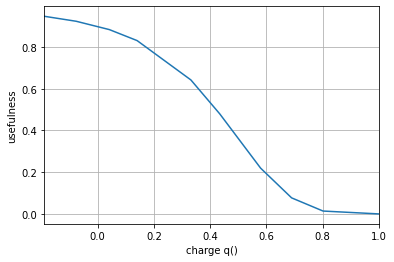

In [ ]:
plt.plot(Xs, Us)
plt.xlim([Xs[-1], Xs[0]])
plt.xlabel('charge q()')
plt.ylabel('usefulness')
plt.grid(True)

In [ ]:
q = 1
uncertainty_Vr0 = 0
states = np.zeros([steps+1,1])
true_state = np.random.normal(1,0)
states[0,0] = true_state
measurs = [4.21, 3.83, 3.92, 3.89, 3.88, 3.89, 3.91, 3.57, 3.21]

In [ ]:
for k in np.arange(1,steps+1):

    noise = np.random.normal(0, 0.05)

    real_state -= noise - 0.1
    
    w = np.random.normal(0, 0.1)

    measurments[k,0] = measurs[k-1]
    
    Kp = q - 0.1
    K_uncertainty = dynamic*uncertainty_Vr0*dynamic + sigma_v2
    
    H = 3*(Kp-1)**2
    K = K_uncertainty*H*1/(H*K_uncertainty*H + sigma_w2)
    
    AVGs = 4 + ((Kp)-1)**3
    
    q = Kp + K*(measurments[k,0]-AVGs)
    uncertainty_Vr0 = (1 - K*H)*K_uncertainty*(1 - K*H) + K*sigma_w2*K 

    charges[k,0] = q
    uncertainties[k,0] = uncertainty_Vr0
    states[k,0] = real_state

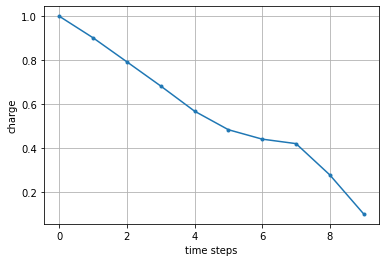

In [ ]:
plt.plot(charges[:,0],'.-')
plt.xlabel('time steps')
plt.ylabel('charge')
plt.grid(True)

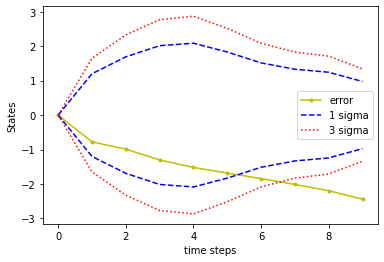

In [ ]:
plt.plot(charges[:,0]-states[:,0],'y.-',label="error")
plt.plot(np.sqrt(uncertainties[:,0]),'b--',label="1 sigma")
plt.plot(-np.sqrt(uncertainties[:,0]),'b--',)
plt.plot(3*np.sqrt(uncertainties[:,0]),'r:',label="3 sigma")
plt.plot(-3*np.sqrt(uncertainties[:,0]),'r:',)
plt.xlabel('time steps')
plt.ylabel('States')
plt.legend()

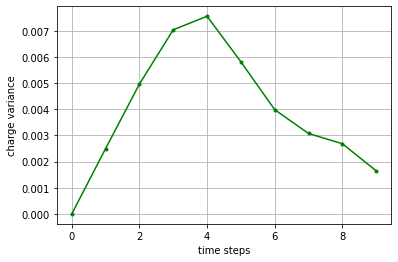

In [ ]:
plt.plot(uncertainties[:,0],'g.-')
plt.xlabel('time steps')
plt.ylabel('charge variance')
plt.grid(True)

In [ ]:
j=0.1
sigma=0.05
avg=1-9*j
var=9*sigma**2
print(f'the mean with no voltage measurements is {round(avg,2)}')
print(f'the variance with no voltage measurements is {round(var,2)}')

mean with no voltage measurements: 0.1
variance with no voltage measurements: 0.02


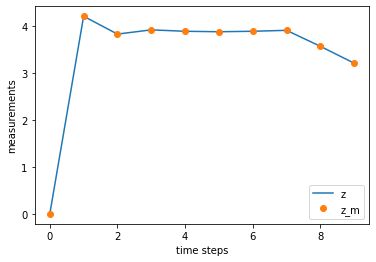

In [ ]:
plt.plot(measurments[:,0],label="z")
plt.plot([0] + measurments,'o',label="z_m")

plt.xlabel('time steps')
plt.ylabel('measurements')
plt.legend();